In [6]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

from models import BaselineSpiralClassifier
from preprocess import load_tensors, phi

from training import TrainingInstance

plt.style.use('ggplot')

seed = 12345324
np.random.seed(seed)
torch.random.manual_seed(seed)

baseline_model = BaselineSpiralClassifier()
loss = nn.BCEWithLogitsLoss()

epochs = 1000
inertia = 0.7
a1 = 1.5
a2 = 1.8
population_size = 30
search_range = 500

x_train, y_train, x_val, y_val, x_test, y_test = load_tensors('/home/mclancy/Documents/notes/edinburgh/year4/naturalcomputing/coursework/data/two_spirals.dat')

inertia_range = np.arange(-3, 3.5, 0.2)
a1_range = np.arange(-3, 3.2, 0.2)
a2_range = np.arange(-3, 3.2, 0.2)
population_size_range = [1e0, 1e1, 1e2, 1e3, 1e4]
search_space_range = [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]

varied_inertia_instances = []
for x in inertia_range:
    training_instance = TrainingInstance(
        instance_name=r"$\omega = {:.2f}$".format(x), model=baseline_model, loss=loss, epochs=epochs,
        inertia=x, a1=a1, a2=a2, population_size=population_size, search_range=search_range, seed=seed
    )
    training_instance.fit(x_train=phi(x_train), y_train=y_train, x_val=phi(x_val), y_val=y_val)
    varied_inertia_instances.append(training_instance)

print("Done")

varied_a1_instances = []
for x in a1_range:
    training_instance = TrainingInstance(
        instance_name=r"$\a1 = {:.2f}$".format(x), model=baseline_model, loss=loss, epochs=epochs,
        inertia=inertia, a1=x, a2=a2, population_size=population_size, search_range=search_range, seed=seed
    )
    training_instance.fit(x_train=phi(x_train), y_train=y_train, x_val=phi(x_val), y_val=y_val)
    varied_a1_instances.append(training_instance)

print("Done")

varied_a2_instances = []
for x in a2_range:
    training_instance = TrainingInstance(
        instance_name=r"$\a2 = {:.2f}$".format(x), model=baseline_model, loss=loss, epochs=epochs,
        inertia=inertia, a1=a1, a2=x, population_size=population_size, search_range=search_range, seed=seed
    )
    training_instance.fit(x_train=phi(x_train), y_train=y_train, x_val=phi(x_val), y_val=y_val)
    varied_a2_instances.append(training_instance)

print("Done")

varied_population_size_instances = []
for x in population_size_range:
    training_instance = TrainingInstance(
        instance_name=r"$\N = {:.2f}$".format(x), model=baseline_model, loss=loss, epochs=epochs,
        inertia=inertia, a1=a1, a2=a2, population_size=int(x), search_range=search_range, seed=seed
    )
    training_instance.fit(x_train=phi(x_train), y_train=y_train, x_val=phi(x_val), y_val=y_val)
    varied_population_size_instances.append(training_instance)

print("Done")

varied_search_space_instances = []
for x in search_space_range:
    training_instance = TrainingInstance(
        instance_name=r"$\Search space size = {:.2f}$".format(search_range), model=baseline_model, loss=loss, epochs=epochs,
        inertia=inertia, a1=a1, a2=a2, population_size=population_size, search_range=x, seed=seed
    )
    training_instance.fit(x_train=phi(x_train), y_train=y_train, x_val=phi(x_val), y_val=y_val)
    varied_search_space_instances.append(training_instance)

print("Done")

Done
Done
Done
Done
Done


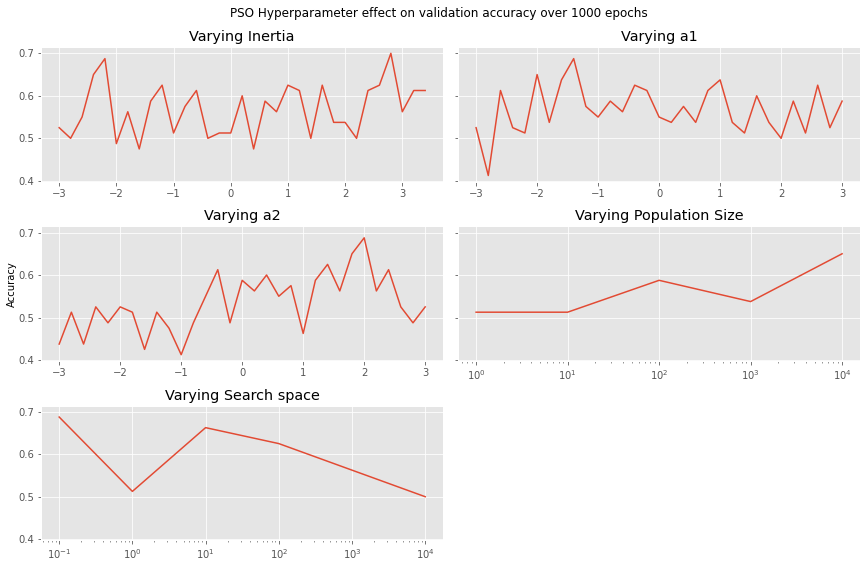

In [11]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(12, 8), sharey=True)
fig.text(0, 0.5, 'Accuracy', va='center', rotation='vertical')
plt.suptitle("PSO Hyperparameter effect on validation accuracy over 1000 epochs")

varied_inertia_accuracies = [training_instance.get_performances().loc[("val", "accuracy")].iloc[-1] for training_instance in varied_inertia_instances]
ax[0,0].set_title("Varying Inertia")
ax[0,0].plot(inertia_range, varied_inertia_accuracies)

varied_a1_accuracies = [training_instance.get_performances().loc[("val", "accuracy")].iloc[-1] for training_instance in varied_a1_instances]
ax[0,1].set_title("Varying a1")
ax[0,1].plot(a1_range, varied_a1_accuracies)

varied_a2_accuracies = [training_instance.get_performances().loc[("val", "accuracy")].iloc[-1] for training_instance in varied_a2_instances]
ax[1,0].set_title("Varying a2")
ax[1,0].plot(a2_range, varied_a2_accuracies)

varied_population_size_accuracies = [training_instance.get_performances().loc[("val", "accuracy")].iloc[-1] for training_instance in varied_population_size_instances]
ax[1,1].set_title("Varying Population Size")
ax[1,1].plot(population_size_range, varied_population_size_accuracies)
ax[1,1].set_xscale("log")

varied_search_space_accuracies = [training_instance.get_performances().loc[("val", "accuracy")].iloc[-1] for training_instance in varied_search_space_instances]
ax[2,0].set_title("Varying Search space")
ax[2,0].plot(search_space_range, varied_search_space_accuracies)
ax[2,0].set_xscale("log")
ax[2,0].set_xticks(search_space_range)

fig.delaxes(ax[2,1])
fig.tight_layout()

plt.savefig("/home/mclancy/Documents/notes/edinburgh/year4/naturalcomputing/coursework/figures/hyperparametersearch_1.pdf")

In [8]:
print()